In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score

# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model, load_model 
# from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# from tensorflow.keras.utils import to_categorical

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [21]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

In [131]:
test=pd.read_csv("../data/R03/치킨_R03.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      2000 non-null   object 
 1   ID            2000 non-null   object 
 2   Post_num      2000 non-null   float64
 3   Followers     2000 non-null   float64
 4   Contents      2000 non-null   object 
 5   Tags          2000 non-null   object 
 6   Tags_sum      2000 non-null   int64  
 7   Tags_count    2000 non-null   int64  
 8   Tags_rate     2000 non-null   float64
 9   Likes         2000 non-null   int64  
 10  Scaled_likes  2000 non-null   float64
 11  Contents_len  2000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 187.6+ KB


In [132]:
test.head()

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
0,치킨,z.e.o.m,236.0,8603.0,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,"#동근이숯불두마리치킨, #동근이숯불두마리치킨, #치킨, #치킨맛집, #배달치킨, #...",11,3,27.27,1040,0.175646,477
1,치킨,foodgangster_fgg,128.0,3360.0,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,"#치킨매니아, #푸드갱_배달, #배달맛집, #치킨맛집, #떡볶이맛집, #배달음식추천...",9,3,33.33,109,0.018409,262
2,치킨,bboong_bbang_2,741.0,6928.0,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,,0,0,0.00,109,0.018409,511
3,치킨,dhrkspths,2178.0,27000.0,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,,0,0,0.00,9,0.001520,26
4,치킨,a_a_bl0s2om,606.0,1020.0,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,"#대구맛집, #먹방, #instafood, #요리스타그램, #요리, #맛스타그램, ...",28,8,28.57,19,0.003209,193


In [133]:
### 태그에 일상을 포함한 게시물

daily = test[test["Tags"].str.contains("(일상)")]
daily

C:\Users\user\AppData\Local\Temp\ipykernel_11872\4228455085.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  daily = test[test["Tags"].str.contains("(일상)")]


,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
12,치킨,friendlyleung,5877.0,1717.0,2022 10 16저녁 Noodles with Fishballs Mea...,"#梁家家常菜________________________, #dinner, #dads...",30,8,26.67,10,0.001689,306
13,치킨,friendlyleung,5877.0,1717.0,2022 10 10저녁 梁家家常菜___________...,"#梁家家常菜________________________, #dinner, #dads...",30,8,26.67,27,0.004560,243
17,치킨,e.cla.tant__bob,235.0,146.0,크크크 치킨 맛있다 맛집 신혼부부 신혼 부부 일상 부부스타그램 신혼부부밥상 신혼부...,"#맛집, #신혼부부, #신혼, #부부, #일상, #부부스타그램, #신혼부부밥상, #...",12,3,25.00,2,0.000338,67
37,치킨,mukjasa._.03,255.0,1793.0,먹스타그램 먹스타 대구 수성구 범어동 맛집추천 맛집스타그램 도리...,"#먹스타그램, #먹스타, #대구, #수성구, #범어동, #맛집추천, #맛집스타그램,...",29,8,27.59,16,0.002702,200
65,치킨,meokksta,1196.0,305.0,황금올리브치킨 bbq황금올리브치킨 치킨 후라이드치킨 치킨스타그램 통닭 ...,"#황금올리브치킨, #bbq황금올리브치킨, #치킨, #후라이드치킨, #치킨스타그램, ...",25,10,40.00,11,0.001858,200
...,...,...,...,...,...,...,...,...,...,...,...,...
1977,치킨,im._nan,16.0,8.0,치킨 도자기 그릇 도자기그릇 치킨 사진 저녁 점심 메뉴 메뉴...,"#🐔치킨..., #도자기, #그릇, #도자기그릇, #치킨, #사진, #저녁, #점심...",31,6,19.35,15,0.002533,214
1979,치킨,sungwhancho7,2027.0,1787.0,치킨은 간단히아시죠 치킨은 늦을수록 맛나다교촌 허니콤보는 바삭하고 달고 짭조름 인...,"#인스타, #instadaily, #먹스타그램, #맛스타그램, #맛집, #먹스타맞팔...",25,6,24.00,72,0.012160,218
1982,치킨,jolee20208,869.0,844.0,큰딸이 한턱 낸치킨다컸네 우리딸 고마워 치킨 야식스타그램 맛있다그램 먹방 ...,"#치킨, #야식스타그램, #맛있다그램, #먹방, #일상요리그램, #먹팔, #먹팔스타그램",7,3,42.86,65,0.010978,62
1984,치킨,juhee2020,307.0,77.0,부산 BHC BHC골드킹 치킨 일상공유 음식스타그램 먹방스타그램 맛있다그램 야...,"#부산, #BHC, #BHC골드킹, #치킨, #일상공유, #음식스타그램, #먹방스타...",12,3,25.00,8,0.001351,88


In [134]:
# 중복 아이디 제거함 -> 평균 팔로워 수
daily_2 = daily.drop_duplicates(['ID'], keep='first')
daily_2

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
12,치킨,friendlyleung,5877.0,1717.0,2022 10 16저녁 Noodles with Fishballs Mea...,"#梁家家常菜________________________, #dinner, #dads...",30,8,26.67,10,0.001689,306
17,치킨,e.cla.tant__bob,235.0,146.0,크크크 치킨 맛있다 맛집 신혼부부 신혼 부부 일상 부부스타그램 신혼부부밥상 신혼부...,"#맛집, #신혼부부, #신혼, #부부, #일상, #부부스타그램, #신혼부부밥상, #...",12,3,25.00,2,0.000338,67
37,치킨,mukjasa._.03,255.0,1793.0,먹스타그램 먹스타 대구 수성구 범어동 맛집추천 맛집스타그램 도리...,"#먹스타그램, #먹스타, #대구, #수성구, #범어동, #맛집추천, #맛집스타그램,...",29,8,27.59,16,0.002702,200
65,치킨,meokksta,1196.0,305.0,황금올리브치킨 bbq황금올리브치킨 치킨 후라이드치킨 치킨스타그램 통닭 ...,"#황금올리브치킨, #bbq황금올리브치킨, #치킨, #후라이드치킨, #치킨스타그램, ...",25,10,40.00,11,0.001858,200
71,치킨,francken_sinwol,17.0,34.0,점점 주방이모스타일로 바뀌는중 무조건 편하고 따뜻한게 최고 모두들 감기 조심하세요 ...,"#시장쇼핑맛들림, #좋아요반사, #좋아요그램, #좋반테러, #오늘뭐먹지, #일상, ...",28,7,25.00,15,0.002533,232
...,...,...,...,...,...,...,...,...,...,...,...,...
1977,치킨,im._nan,16.0,8.0,치킨 도자기 그릇 도자기그릇 치킨 사진 저녁 점심 메뉴 메뉴...,"#🐔치킨..., #도자기, #그릇, #도자기그릇, #치킨, #사진, #저녁, #점심...",31,6,19.35,15,0.002533,214
1979,치킨,sungwhancho7,2027.0,1787.0,치킨은 간단히아시죠 치킨은 늦을수록 맛나다교촌 허니콤보는 바삭하고 달고 짭조름 인...,"#인스타, #instadaily, #먹스타그램, #맛스타그램, #맛집, #먹스타맞팔...",25,6,24.00,72,0.012160,218
1982,치킨,jolee20208,869.0,844.0,큰딸이 한턱 낸치킨다컸네 우리딸 고마워 치킨 야식스타그램 맛있다그램 먹방 ...,"#치킨, #야식스타그램, #맛있다그램, #먹방, #일상요리그램, #먹팔, #먹팔스타그램",7,3,42.86,65,0.010978,62
1984,치킨,juhee2020,307.0,77.0,부산 BHC BHC골드킹 치킨 일상공유 음식스타그램 먹방스타그램 맛있다그램 야...,"#부산, #BHC, #BHC골드킹, #치킨, #일상공유, #음식스타그램, #먹방스타...",12,3,25.00,8,0.001351,88


In [135]:
print('일상 게시물')
print('평균 좋아요수 : ', round(daily['Likes'].mean(),1))
print('평균 본문글자수 : ', round(daily['Contents_len'].mean(),1))
print('평균 사용된 태그수 : ', round(daily['Tags_sum'].mean(),1))

print('---------------------------------------------------------------------------------------')

print('평균 팔로워 수 : ', round(daily_2['Followers'].mean(),1))



일상 게시물
평균 좋아요수 :  42.5
평균 본문글자수 :  182.2
평균 사용된 태그수 :  22.2
---------------------------------------------------------------------------------------
평균 팔로워 수 :  1362.0


In [36]:
Tag = []
for i in daily["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#梁家家常菜________________________',
 '#dinner',
 '#dadscooking',
 '#noodles',
 '#fishball',
 '#meatballs',
 '#chickenwings',
 '#chicken',
 '#homemade',
 '#jmt',
 '#yummy',
 '#lifestyle',
 '#daily',
 '#저녁',
 '#집밥',
 '#국수',
 '#미트볼',
 '#치킨',
 '#고기',
 '#홈메이드',
 '#홈쿡',
 '#냠냠',
 '#먹스타그램',
 '#맛스타그램',
 '#맛있다',
 '#존맛',
 '#좋아요',
 '#라이프스타일',
 '#일상',
 '#데일',
 '#梁家家常菜________________________',
 '#dinner',
 '#dadscooking',
 '#chicken',
 '#mushrooms',
 '#tomato',
 '#eggs',
 '#fish',
 '#homemade',
 '#jmt',
 '#yummy',
 '#lifestyle',
 '#daily',
 '#저녁',
 '#집밥',
 '#치킨',
 '#버섯',
 '#토마토',
 '#계란',
 '#홈메이드',
 '#홈쿡',
 '#냠냠',
 '#먹스타그램',
 '#맛스타그램',
 '#맛있다',
 '#존맛',
 '#좋아요',
 '#라이프스타일',
 '#일상',
 '#데일',
 '#맛집',
 '#신혼부부',
 '#신혼',
 '#부부',
 '#일상',
 '#부부스타그램',
 '#신혼부부밥상',
 '#신혼부부그램',
 '#집밥',
 '#크크크치킨',
 '#60계치킨',
 '#치',
 '#먹스타그램',
 '#먹스타',
 '#대구',
 '#수성구',
 '#범어동',
 '#맛집추천',
 '#맛집스타그램',
 '#도리도우',
 '#치킨',
 '#파채',
 '#메뉴추천',
 '#먹스타팔로우',
 '#먹팔해요',
 '#일상',
 '#일상스타그램',
 '#먹팔',
 '#맞팔',
 '#맞팔환영',
 '#맞팔해요',
 '#댓글환영',
 '#댓반',
 '

In [37]:
from collections import Counter
tag_count = Counter(Tag)
tag_count

tag_daily = tag_count.most_common()
tag_daily 

[('#치킨', 269),
 ('#일상', 225),
 ('#먹스타그램', 138),
 ('#좋아요', 125),
 ('#맛스타그램', 122),
 ('#맞팔', 97),
 ('#맛집', 96),
 ('#일상스타그램', 93),
 ('#소통', 93),
 ('#먹방', 89),
 ('#데일리', 85),
 ('#daily', 77),
 ('#주말', 74),
 ('#술스타그램', 68),
 ('#치맥', 62),
 ('#맥주', 53),
 ('#럽스타그램', 53),
 ('#데이트', 51),
 ('#불금', 51),
 ('#소주', 49),
 ('#먹스타', 48),
 ('#술', 48),
 ('#부산', 47),
 ('#좋아요반사', 44),
 ('#f4f', 44),
 ('#jmt', 43),
 ('#삼겹살', 43),
 ('#소맥', 41),
 ('#곱창', 41),
 ('#서울', 40),
 ('#선팔', 37),
 ('#팔로우', 36),
 ('#팔로', 36),
 ('#먹팔', 33),
 ('#저녁', 29),
 ('#좋반', 27),
 ('#food', 25),
 ('#음식', 23),
 ('#야식', 23),
 ('#인친', 22),
 ('#선팔하면맞팔', 22),
 ('#집밥', 21),
 ('#셀카', 21),
 ('#chicken', 20),
 ('#후라이드', 19),
 ('#존맛', 17),
 ('#foodstagram', 16),
 ('#먹스타맞팔', 16),
 ('#홈쿡', 15),
 ('#푸드스타그램', 15),
 ('#먹방스타그램', 15),
 ('#맛있다', 14),
 ('#맞팔환영', 14),
 ('#팔로워', 14),
 ('#오늘뭐먹지', 13),
 ('#치킨맛집', 13),
 ('#일', 13),
 ('#맛스타', 13),
 ('#맛있다그램', 13),
 ('#카페', 13),
 ('#피자', 13),
 ('#셀스타그램', 13),
 ('#치킨스타그램', 12),
 ('#강서구맛집', 12),
 ('#양천구맛집', 12)

(-0.5, 299.5, 199.5, -0.5)

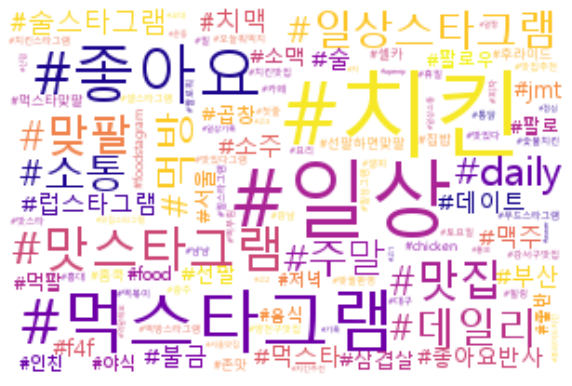

In [39]:
wc_daily= WordCloud(max_font_size=50, background_color="white", max_words=700,
                    colormap = 'plasma', width=300,
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(tag_daily))

plt.figure(figsize=(10,10))
plt.imshow(wc_daily, interpolation="bilinear")
plt.axis("off")

In [136]:
### 태그에 광고 또는 협찬을 포함한 게시물

ad = test[test["Tags"].str.contains("(광고)|(협찬)")]
ad

C:\Users\user\AppData\Local\Temp\ipykernel_11872\3576502041.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ad = test[test["Tags"].str.contains("(광고)|(협찬)")]


,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
193,치킨,eumsikenjoy,30.0,73.0,퇴근하고 먹은 맛있는 피자와 치킨 맥주가 땡기지만 내일을 위해 탄산 치...,"#치킨, #피자, #퇴근후, #저녁, #식사, #한끼, #온더테이블, #신도림맛집,...",30,6,20.00,34,0.005742,210
212,치킨,0rbbang,785.0,3230.0,당치땡 블랙킹 치킨 맛집후기 협찬 오늘 저녁은 엄마와 거하게 빵커타임을 ...,"#당치땡, #블랙킹, #치킨, #맛집후기, #협찬, #랜덤부적, #당치땡메뉴추천, ...",8,1,12.50,19,0.003209,605
232,치킨,min_ji_taste,189.0,1375.0,연말회식 메뉴추천 끝나가는 2022년마지막 달인 12월을 맞이해수 많은 약속 회...,"#연말회식, #누구나홀딱반한닭, #오븐구이치킨을, #누구나홀딱반한닭, #치킨, #치...",29,5,17.24,4,0.000676,389
245,치킨,sso_eul_taste,234.0,4718.0,맛있는 치킨 다들 궁금하지 않아 누구나홀딱반한닭에 시그니처 메뉴후레쉬쌈닭 싱싱찬...,"#치킨파티🍗, #다이어트치킨, #치맥🍻🍗, #치킨맥주, #신년회식, #치킨맥주, #...",26,2,7.69,4,0.000676,320
247,치킨,ch_ooha_taste,260.0,3587.0,누구나홀딱반한닭 쌈닭3종 중 또띠아와 함께 쌈싸먹는 쌈닭화히타 볶아놓은 야채들과 각...,"#야식치킨, #맥주전문점, #치킨한마리, #치킨그램, #치킨먹는날, #치킨은사랑입니...",26,4,15.38,7,0.001182,337
...,...,...,...,...,...,...,...,...,...,...,...,...
1797,치킨,food_ono,25.0,2635.0,협찬 네네치킨 X 허닭 네꼬닭네네치킨과 허닭이 만났다 집에서도 간편하게 먹을...,"#협찬, #네네치킨, #허닭, #네꼬닭, #치킨추천, #야식추천, #안산맛집, #안...",16,3,18.75,178,0.030062,437
1847,치킨,seung.y09,447.0,6026.0,협찬월수금은 후참 할인받는 요일 배달의민족 배민원 매주 금요일 2천원 할인 ...,"#협찬월수금은, #후참, #후참잘, #후라이드참잘하는집, #금요일, #주말, #치킨...",13,5,38.46,19,0.003209,413
1860,치킨,mss2mk,2092.0,57000.0,협찬네네치킨이 새로운 신메뉴인 로제게티와 매콤게티가 나왔데요 바삭한 치킨과 함...,"#협찬네네치킨이, #네네치킨, #네네치킨신메뉴, #네네치킨사이드, #국물게티, #로...",26,4,15.38,557,0.094072,732
1861,치킨,moms38_table,271.0,3102.0,협찬 무료제공 무료지원킹용가리가 나타났다 으르렁렁렁 용가리 친구들...,"#협찬, #무료제공, #무료지원킹용가리가, #용가리치킨, #하림, #용가리어린이세트...",19,1,5.26,245,0.041378,344


In [137]:
ad_2 = ad.drop_duplicates(['ID'], keep='first')
ad_2

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
193,치킨,eumsikenjoy,30.0,73.0,퇴근하고 먹은 맛있는 피자와 치킨 맥주가 땡기지만 내일을 위해 탄산 치...,"#치킨, #피자, #퇴근후, #저녁, #식사, #한끼, #온더테이블, #신도림맛집,...",30,6,20.00,34,0.005742,210
212,치킨,0rbbang,785.0,3230.0,당치땡 블랙킹 치킨 맛집후기 협찬 오늘 저녁은 엄마와 거하게 빵커타임을 ...,"#당치땡, #블랙킹, #치킨, #맛집후기, #협찬, #랜덤부적, #당치땡메뉴추천, ...",8,1,12.50,19,0.003209,605
232,치킨,min_ji_taste,189.0,1375.0,연말회식 메뉴추천 끝나가는 2022년마지막 달인 12월을 맞이해수 많은 약속 회...,"#연말회식, #누구나홀딱반한닭, #오븐구이치킨을, #누구나홀딱반한닭, #치킨, #치...",29,5,17.24,4,0.000676,389
245,치킨,sso_eul_taste,234.0,4718.0,맛있는 치킨 다들 궁금하지 않아 누구나홀딱반한닭에 시그니처 메뉴후레쉬쌈닭 싱싱찬...,"#치킨파티🍗, #다이어트치킨, #치맥🍻🍗, #치킨맥주, #신년회식, #치킨맥주, #...",26,2,7.69,4,0.000676,320
247,치킨,ch_ooha_taste,260.0,3587.0,누구나홀딱반한닭 쌈닭3종 중 또띠아와 함께 쌈싸먹는 쌈닭화히타 볶아놓은 야채들과 각...,"#야식치킨, #맥주전문점, #치킨한마리, #치킨그램, #치킨먹는날, #치킨은사랑입니...",26,4,15.38,7,0.001182,337
...,...,...,...,...,...,...,...,...,...,...,...,...
1797,치킨,food_ono,25.0,2635.0,협찬 네네치킨 X 허닭 네꼬닭네네치킨과 허닭이 만났다 집에서도 간편하게 먹을...,"#협찬, #네네치킨, #허닭, #네꼬닭, #치킨추천, #야식추천, #안산맛집, #안...",16,3,18.75,178,0.030062,437
1847,치킨,seung.y09,447.0,6026.0,협찬월수금은 후참 할인받는 요일 배달의민족 배민원 매주 금요일 2천원 할인 ...,"#협찬월수금은, #후참, #후참잘, #후라이드참잘하는집, #금요일, #주말, #치킨...",13,5,38.46,19,0.003209,413
1860,치킨,mss2mk,2092.0,57000.0,협찬네네치킨이 새로운 신메뉴인 로제게티와 매콤게티가 나왔데요 바삭한 치킨과 함...,"#협찬네네치킨이, #네네치킨, #네네치킨신메뉴, #네네치킨사이드, #국물게티, #로...",26,4,15.38,557,0.094072,732
1861,치킨,moms38_table,271.0,3102.0,협찬 무료제공 무료지원킹용가리가 나타났다 으르렁렁렁 용가리 친구들...,"#협찬, #무료제공, #무료지원킹용가리가, #용가리치킨, #하림, #용가리어린이세트...",19,1,5.26,245,0.041378,344


In [138]:
# daily 보다 왜 평균 좋아요 수가 높을까?

print('광고,협찬 게시물')
print('평균 좋아요수 : ', round(ad['Likes'].mean(),1))
print('평균 본문글자수 : ', round(ad['Contents_len'].mean(),1))
print('평균 사용된 태그수 : ', round(ad['Tags_sum'].mean(),1))
print('---------------------------------------------------------------------------------------')

print('평균 팔로워 수 : ', round(ad_2['Followers'].mean(),1))

ad["ID"].nunique()

광고,협찬 게시물
평균 좋아요수 :  74.2
평균 본문글자수 :  355.4
평균 사용된 태그수 :  24.4
---------------------------------------------------------------------------------------
평균 팔로워 수 :  11146.4


97

In [50]:
Tag = []
for i in ad["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#치킨',
 '#피자',
 '#퇴근후',
 '#저녁',
 '#식사',
 '#한끼',
 '#온더테이블',
 '#신도림맛집',
 '#서울맛집',
 '#먹방',
 '#먹부림',
 '#좋아요반사',
 '#좋반',
 '#저녁메뉴',
 '#저녁추천',
 '#오늘뭐먹지',
 '#야식',
 '#야식맛집',
 '#치킨맛집',
 '#내돈내먹',
 '#후라이드치킨',
 '#잘먹었습니다',
 '#배부름',
 '#먹팔',
 '#먹스타맞팔',
 '#협찬문의',
 '#맛있다',
 '#추천맛집',
 '#또먹고싶다',
 '#요기',
 '#당치땡',
 '#블랙킹',
 '#치킨',
 '#맛집후기',
 '#협찬',
 '#랜덤부적',
 '#당치땡메뉴추천',
 '#당치땡추',
 '#연말회식',
 '#누구나홀딱반한닭',
 '#오븐구이치킨을',
 '#누구나홀딱반한닭',
 '#치킨',
 '#치킨맛집',
 '#신년회모임',
 '#쌈닭',
 '#치킨맥주',
 '#야식치킨',
 '#치킨치킨',
 '#존맛탱구리',
 '#치킨메뉴추천',
 '#맥주전문점',
 '#치맥',
 '#맛집',
 '#오븐치킨구이',
 '#치킨한마리',
 '#치킨먹방',
 '#치쏘',
 '#치킨스타그램🍗',
 '#치킨그램',
 '#맥주안주',
 '#치킨집',
 '#신년파티🎉',
 '#치킨먹는날',
 '#오븐치킨',
 '#배달맛집',
 '#광',
 '#치킨파티🍗',
 '#다이어트치킨',
 '#치맥🍻🍗',
 '#치킨맥주',
 '#신년회식',
 '#치킨맥주',
 '#치킨메뉴추천',
 '#오븐치킨구이',
 '#치킨스타그램🍗',
 '#신년파티🎉',
 '#존맛탱',
 '#구운치킨',
 '#맛집리뷰',
 '#야식배달',
 '#치킨파티',
 '#치킨은사랑입니다',
 '#야식메뉴추천',
 '#계묘년',
 '#모임장소추천',
 '#회식장소',
 '#누구나홀딱반한닭',
 '#치킨',
 '#치킨맛집',
 '#신년회모임',
 '#쌈닭',
 '#광',
 '#야식치킨',
 '#맥주전문점',
 '#치킨한마리',
 '#치킨그램',
 '#치킨먹는날',
 '#치킨은사랑입

In [51]:
from collections import Counter
tag_count = Counter(Tag)
tag_count

ad_tag = tag_count.most_common()
ad_tag

[('#치킨', 101),
 ('#치킨맛집', 85),
 ('#누구나홀딱반한닭', 78),
 ('#신년회모임', 77),
 ('#쌈닭', 77),
 ('#광', 77),
 ('#치킨먹는날', 62),
 ('#치킨맥주', 60),
 ('#치킨먹방', 54),
 ('#야식치킨', 52),
 ('#맥주전문점', 52),
 ('#치킨한마리', 52),
 ('#치킨그램', 52),
 ('#치맥', 36),
 ('#맛집', 35),
 ('#치킨메뉴추천', 32),
 ('#치킨스타그램🍗', 32),
 ('#신년파티🎉', 32),
 ('#오븐치킨', 32),
 ('#치킨치킨', 31),
 ('#오븐치킨구이', 31),
 ('#맥주안주', 31),
 ('#치느님', 31),
 ('#치킨추천', 30),
 ('#치킨스타그램', 29),
 ('#치킨파티🍗', 28),
 ('#다이어트치킨', 28),
 ('#치맥🍻🍗', 28),
 ('#신년회식', 28),
 ('#존맛탱구리', 27),
 ('#치쏘', 27),
 ('#치킨집', 27),
 ('#배달맛집', 27),
 ('#치킨은사랑', 25),
 ('#야식메뉴', 24),
 ('#신년회', 24),
 ('#맛있는치킨', 23),
 ('#치킨이닭', 23),
 ('#오븐구이', 23),
 ('#배달맛집추천', 18),
 ('#치킨은언제나옳다', 18),
 ('#다이어트메뉴', 18),
 ('#치맥🍻', 18),
 ('#신년파티', 18),
 ('#치킨은사랑입니다', 16),
 ('#협찬', 15),
 ('#치킨파티', 14),
 ('#야식메뉴추천', 14),
 ('#계묘년', 14),
 ('#모임장소추천', 14),
 ('#회식장소', 14),
 ('#신년회하자', 13),
 ('#모임맛집', 13),
 ('#신년이니까', 13),
 ('#치킨또띠아', 13),
 ('#치킨에맥주', 13),
 ('#존맛탱', 12),
 ('#구운치킨', 12),
 ('#맛집리뷰', 12),
 ('#야식배달', 12),
 ('#치킨은사랑입니다💕', 

(-0.5, 299.5, 199.5, -0.5)

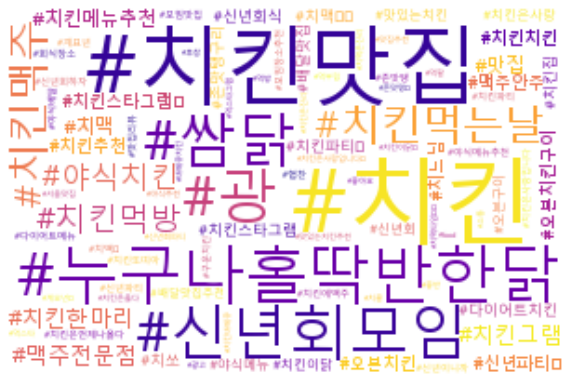

In [52]:
wc_ad= WordCloud(max_font_size=50, background_color="white", max_words=700,
                    colormap = 'plasma', width=300,
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(ad_tag))

plt.figure(figsize=(10,10))
plt.imshow(wc_ad, interpolation="bilinear")
plt.axis("off")

# 데일리 보다.... 좀 더 목적성이 있는 키워드 

### 중복 아이디 _ 계정 분석 

In [93]:
result=test[test["Tags"].str.contains("(광고)|(협찬)|(일상)")]

C:\Users\user\AppData\Local\Temp\ipykernel_11872\3997589439.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  result=test[test["Tags"].str.contains("(광고)|(협찬)|(일상)")]


In [120]:
result[result['ID']=='ssaranghae_u']

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
682,치킨,ssaranghae_u,2472.0,71000.0,협찬치킨은 언제나 맛나맛나 맛난 치킨과 함께 먹으면 더 맛있는 사이드메뉴가 네네치...,"#협찬치킨은, #네네치킨, #네네치킨신메뉴, #네네치킨사이드, #국물게티, #로제게...",9,0,0.0,19,0.003209,395


In [115]:
t1=result[result["ID"]=='9697s_2']
t1

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
740,치킨,9697s_2,621.0,131.0,먹스타그램 맛집추천 청주맛집 먹방 먹스타 먹방스타그램 먹부림 먹팔 맛집탐방 데이트...,"#먹스타그램, #맛집추천, #청주맛집, #먹방, #먹스타, #먹방스타그램, #먹부림...",30,9,30.00,22,0.003716,128
741,치킨,9697s_2,621.0,131.0,먹스타그램 맛집추천 청주맛집 먹방 먹스타 먹방스타그램 먹부림 먹팔 맛집탐방 데이트...,"#먹스타그램, #맛집추천, #청주맛집, #먹방, #먹스타, #먹방스타그램, #먹부림...",30,9,30.00,26,0.004391,128
742,치킨,9697s_2,621.0,131.0,먹스타그램 맛집추천 청주맛집 먹방 먹스타 먹방스타그램 먹부림 먹팔 맛집탐방 데이트...,"#먹스타그램, #맛집추천, #청주맛집, #먹방, #먹스타, #먹방스타그램, #먹부림...",29,9,31.03,17,0.002871,125


In [116]:
Tag = []
for i in t1["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#먹스타그램',
 '#맛집추천',
 '#청주맛집',
 '#먹방',
 '#먹스타',
 '#먹방스타그램',
 '#먹부림',
 '#먹팔',
 '#맛집탐방',
 '#데이트',
 '#데이트맛집',
 '#맛집',
 '#좋반',
 '#소통',
 '#협찬',
 '#food',
 '#맞팔해요',
 '#선팔후맞팔',
 '#서울맛집',
 '#소고기',
 '#selfie',
 '#삼겹살',
 '#맛점',
 '#맛저',
 '#청주',
 '#엽떡',
 '#점메추',
 '#치킨',
 '#팔로우',
 '#서',
 '#먹스타그램',
 '#맛집추천',
 '#청주맛집',
 '#먹방',
 '#먹스타',
 '#먹방스타그램',
 '#먹부림',
 '#먹팔',
 '#맛집탐방',
 '#데이트',
 '#데이트맛집',
 '#맛집',
 '#좋반',
 '#소통',
 '#협찬',
 '#food',
 '#맞팔해요',
 '#선팔후맞팔',
 '#서울맛집',
 '#소고기',
 '#selfie',
 '#삼겹살',
 '#맛점',
 '#맛저',
 '#청주',
 '#엽떡',
 '#점메추',
 '#치킨',
 '#팔로우',
 '#서',
 '#먹스타그램',
 '#맛집추천',
 '#청주맛집',
 '#먹방',
 '#먹스타',
 '#먹방스타그램',
 '#먹부림',
 '#먹팔',
 '#맛집탐방',
 '#데이트',
 '#데이트맛집',
 '#맛집',
 '#좋반',
 '#소통',
 '#협찬',
 '#food',
 '#맞팔해요',
 '#선팔후맞팔',
 '#서울맛집',
 '#소고기',
 '#selfie',
 '#삼겹살',
 '#맛점',
 '#맛저',
 '#청주',
 '#엽떡',
 '#점메추',
 '#치킨',
 '#팔로']

In [117]:
from collections import Counter
tag_count = Counter(Tag)
tag_count

tags = tag_count.most_common()
tags

[('#먹스타그램', 3),
 ('#맛집추천', 3),
 ('#청주맛집', 3),
 ('#먹방', 3),
 ('#먹스타', 3),
 ('#먹방스타그램', 3),
 ('#먹부림', 3),
 ('#먹팔', 3),
 ('#맛집탐방', 3),
 ('#데이트', 3),
 ('#데이트맛집', 3),
 ('#맛집', 3),
 ('#좋반', 3),
 ('#소통', 3),
 ('#협찬', 3),
 ('#food', 3),
 ('#맞팔해요', 3),
 ('#선팔후맞팔', 3),
 ('#서울맛집', 3),
 ('#소고기', 3),
 ('#selfie', 3),
 ('#삼겹살', 3),
 ('#맛점', 3),
 ('#맛저', 3),
 ('#청주', 3),
 ('#엽떡', 3),
 ('#점메추', 3),
 ('#치킨', 3),
 ('#팔로우', 2),
 ('#서', 2),
 ('#팔로', 1)]